In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\BR\sgdata.csv")

In [13]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Male,single,67,university,124670,skilled employee / official,2
1,100000002,Female,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,Male,single,49,high school,89210,unemployed / unskilled,0
3,100000004,Male,single,45,high school,171565,skilled employee / official,1
4,100000005,Male,single,53,high school,149031,skilled employee / official,1


In [ ]:
##Which demographic groups (by age, sex, marital status) earn the highest average income?

In [15]:
##Let's look at gender first 

In [29]:
gender_max = df.groupby("Sex")["Income"].sum().reset_index(name = "Total Income").max()
gender_max
print(f"Highest earning gender is {gender_max['Sex']}")

Highest earning gender is Male


In [51]:
##Looking at age
bins = [16, 24, 34, 44, 54, 64, 74, 80]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-80']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age Group
0,100000001,Male,single,67,university,124670,skilled employee / official,2,65-74
1,100000002,Female,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2,17-24
2,100000003,Male,single,49,high school,89210,unemployed / unskilled,0,45-54
3,100000004,Male,single,45,high school,171565,skilled employee / official,1,45-54
4,100000005,Male,single,53,high school,149031,skilled employee / official,1,45-54


In [53]:
highest_earning_age_group = df.groupby('Age Group')["Income"].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42276\1720752043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_earning_age_group = df.groupby('Age Group')["Income"].sum()


In [65]:
highest_earning_age_group.reset_index().sort_values(by = "Income", ascending = False)

,Age Group,Income
1,25-34,92014432
2,35-44,62086851
3,45-54,32324241
0,17-24,28628278
4,55-64,18017109
5,65-74,8284115
6,75-80,553812


In [ ]:
"""age group 25 - 34 are the highest earning group"""

In [67]:
## looking at marital status

In [77]:
marital_status_max = df.groupby("Marital status")['Income'].sum().idxmax()
marital_status_max

'single'

In [ ]:
##Is there a gender income gap in this dataset?

In [103]:
gender_income = df.groupby("Sex")["Income"].sum()

In [105]:
gender_income

Sex
Female    103144943
Male      138763895
Name: Income, dtype: int64

<Axes: xlabel='Sex', ylabel='Income'>

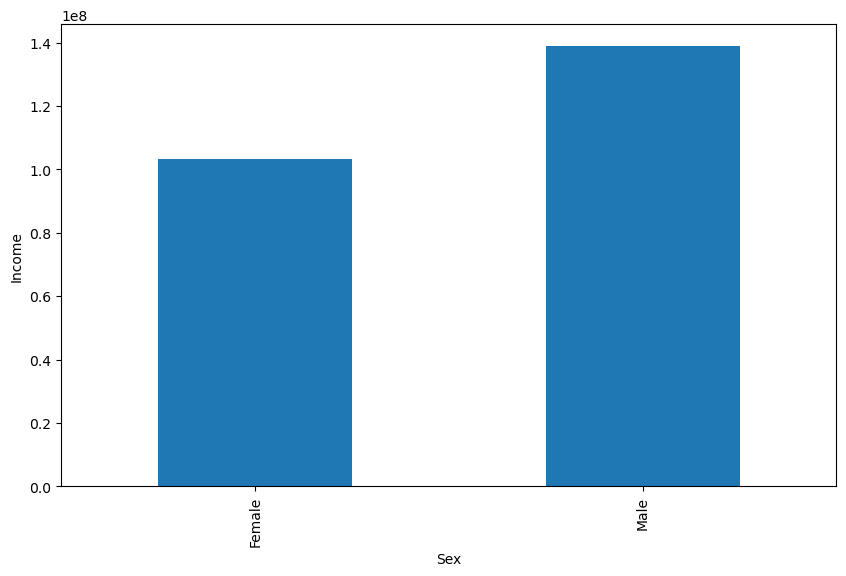

In [111]:
plt.figure(figsize = (10,6))
gender_income.plot(kind = 'bar', xlabel = "Sex", ylabel = "Income")

In [119]:
income_gap = gender_income["Male"] - gender_income["Female"]

In [121]:
income_gap

35618952

In [ ]:
##Does marital status affect income levels?

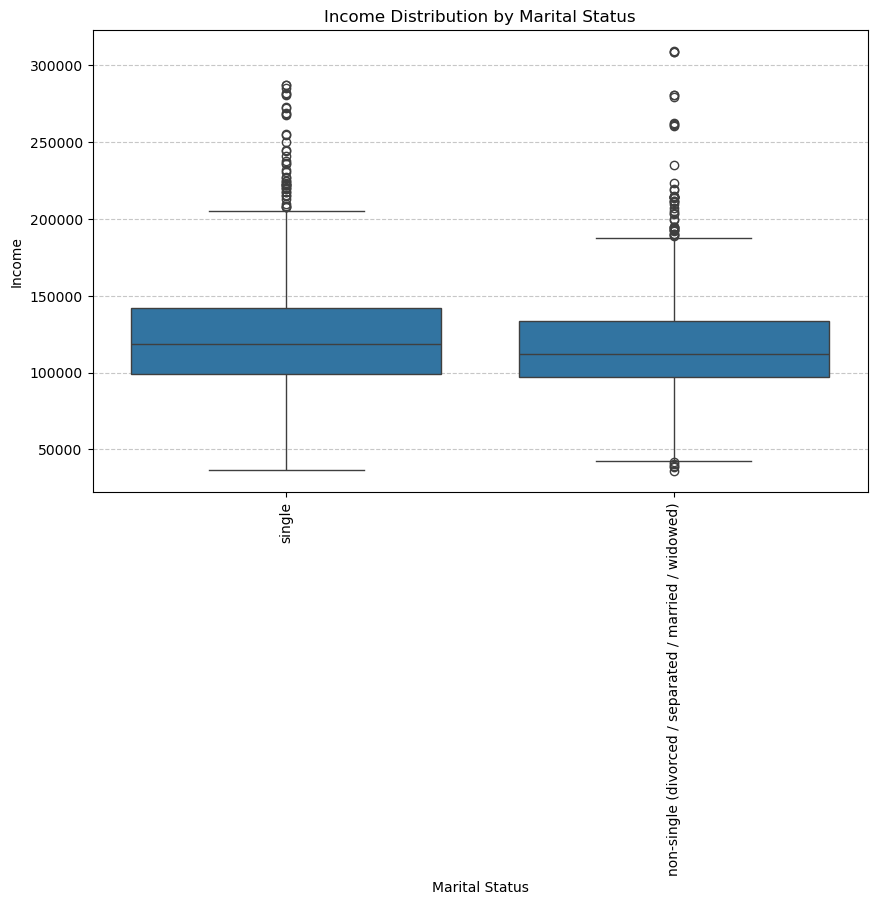

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital status', y='Income', data=df)
plt.title("Income Distribution by Marital Status")
plt.ylabel("Income")
plt.xlabel("Marital Status")
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [125]:
income_by_marital_status = df.groupby("Marital status")["Income"].mean().sort_values(ascending=False)
income_by_marital_status

Marital status
single                                                   123736.232373
non-single (divorced / separated / married / widowed)    118133.385700
Name: Income, dtype: float64

In [ ]:
##How does age correlate with income? Is there a peak earning age range?

In [131]:
df["Age"].corr(df["Income"])

0.34061016373173525

In [135]:
"""Moderate positive correlation: As age increases, income tends to increase — but not in a strictly linear fashion.
    People may earn more as they gain experience, especially from their 20s through mid-40s or 50s."""

'Moderate positive correlation: As age increases, income tends to increase — but not in a strictly linear fashion.\n    People may earn more as they gain experience, especially from their 20s through mid-40s or 50s.'

In [149]:
peak_earning_age = df.groupby("Age Group")["Income"].mean().sort_values(ascending = False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42276\3437124053.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peak_earning_age = df.groupby("Age Group")["Income"].mean().sort_values(ascending = False)


In [151]:
peak_earning_age

Age Group
75-80    184604.000000
65-74    153409.537037
55-64    150142.575000
45-54    132476.397541
35-44    123925.850299
25-34    114445.810945
17-24    104482.766423
Name: Income, dtype: float64

In [ ]:
##Which education level is associated with the highest average income?

In [159]:
df.groupby("Education")["Income"].mean().reset_index().sort_values(by = 'Income',ascending = False)

,Education,Income
0,graduate school,146818.333333
3,university,145405.982818
1,high school,116367.720058
2,other / unknown,115068.212544


In [ ]:
##What is the income distribution across different occupations?

In [163]:
df.groupby("Occupation")["Income"].sum().reset_index(name = "Total Income")

,Occupation,Total Income
0,management / self-employed / highly qualified ...,44755781
1,skilled employee / official,139653089
2,unemployed / unskilled,57499968


In [ ]:
##How does education influence occupation type or likelihood of being unemployed?

In [173]:
df.groupby(["Education", "Occupation"])["ID"].size().unstack()

Occupation,management / self-employed / highly qualified employee / officer,skilled employee / official,unemployed / unskilled
Education,,,
graduate school,11,16,9
high school,154,796,436
other / unknown,27,168,92
university,62,133,96


In [185]:
##CONCLUSION 
## 1. Higher education (graduate school, university) is associated with lower likelihood of unemployment and higher chances of securing skilled or managerial roles.
## 2. Lower education (high school, other/unknown) correlates with a higher risk of unemployment or unskilled occupations.
## 3. The data underscores the importance of education in occupational outcomes and economic stability , Policies aimed at increasing access to higher education could reduce unemployment rates and improve job quality.

In [ ]:
##What occupations dominate among older adults (e.g. 60+)?

In [215]:
df[df["Age"] >= 60].groupby(["Age Group","Occupation"]).size().unstack()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42276\1686120452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df["Age"] >= 60].groupby(["Age Group","Occupation"]).size().unstack()


Occupation,management / self-employed / highly qualified employee / officer,skilled employee / official,unemployed / unskilled
Age Group,,,
17-24,0,0,0
25-34,0,0,0
35-44,0,0,0
45-54,0,0,0
55-64,10,38,15
65-74,17,22,15
75-80,3,0,0


In [217]:
"""skilled employee / official dominates among older adults"""

'skilled employee / official dominates among older adults'

In [ ]:
##Which combination of sex, education, and occupation leads to the highest income?

In [219]:
peak_combination = df.groupby(["Sex", "Education", "Occupation"])["Income"].mean().sort_values(ascending=False)

In [227]:
peak_combination.reset_index().head(5)

,Sex,Education,Occupation,Income
0,Male,university,management / self-employed / highly qualified ...,213998.729730
1,Female,university,management / self-employed / highly qualified ...,201430.720000
2,Female,graduate school,management / self-employed / highly qualified ...,186455.875000
3,Male,graduate school,management / self-employed / highly qualified ...,184600.333333
4,Male,other / unknown,management / self-employed / highly qualified ...,174353.000000


In [ ]:
##Are married university-educated women more likely to be employed than single high school-educated men?

In [237]:
married_uni_women = df[(df["Sex"] == "Female") & 
                       (df["Education"] == "university") & 
                       (df["Marital status"] == "non-single (divorced / separated / married / widowed)")]

single_hs_men = df[(df["Sex"] == "Male") & 
                   (df["Education"] == "high school") & 
                   (df["Marital status"] == "single")]

married_uni_women_employment_rate = (married_uni_women["Occupation"].notna().sum() / len(married_uni_women)) * 100
single_hs_men_employment_rate = (single_hs_men["Occupation"].notna().sum() / len(single_hs_men)) * 100

married_uni_women_employment_rate, single_hs_men_employment_rate

(100.0, 100.0)

In [241]:
"""There's a 100% employment rate for both categories"""

"There's a 100% employment rate for both categories"